<a href="https://colab.research.google.com/github/natreis02/Data_Analytic/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Utilize o dataset iris (iris.csv em anexo ou usando o sklearn)



In [ ]:
from sklearn import datasets
iris = datasets.load_iris()


In [ ]:
# Exibir as primeiras 5 linhas dos dados com a formatação usual do sklearn
print(iris.data[:5])

# Exibir as primeiras 5 linhas das classes alvo (opcional)
print(iris.target[:5])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Responda:

a. Faça uma análise inicial sobre esse dataset.

In [ ]:
import pandas as pd

# Converter para um DataFrame do pandas
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Exibir as primeiras linhas do DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
# Número de instâncias no dataset
num_instances = iris_df.shape[0]
print(f"O conjunto de dados Iris possui {num_instances} instâncias.")

# Tipos de dados
print(iris_df.info())

# Verificar valores faltantes (nulos) no dataset
valores_faltantes = iris_df.isnull().sum()
print(valores_faltantes)


O conjunto de dados Iris possui 150 instâncias.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
# Estatísticas de cada atributo
print(iris_df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


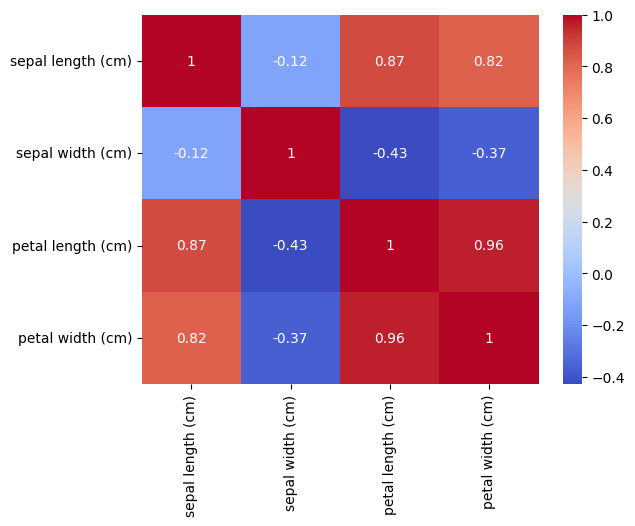

In [ ]:
# Análise de Correlação
corr_matrix = iris_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


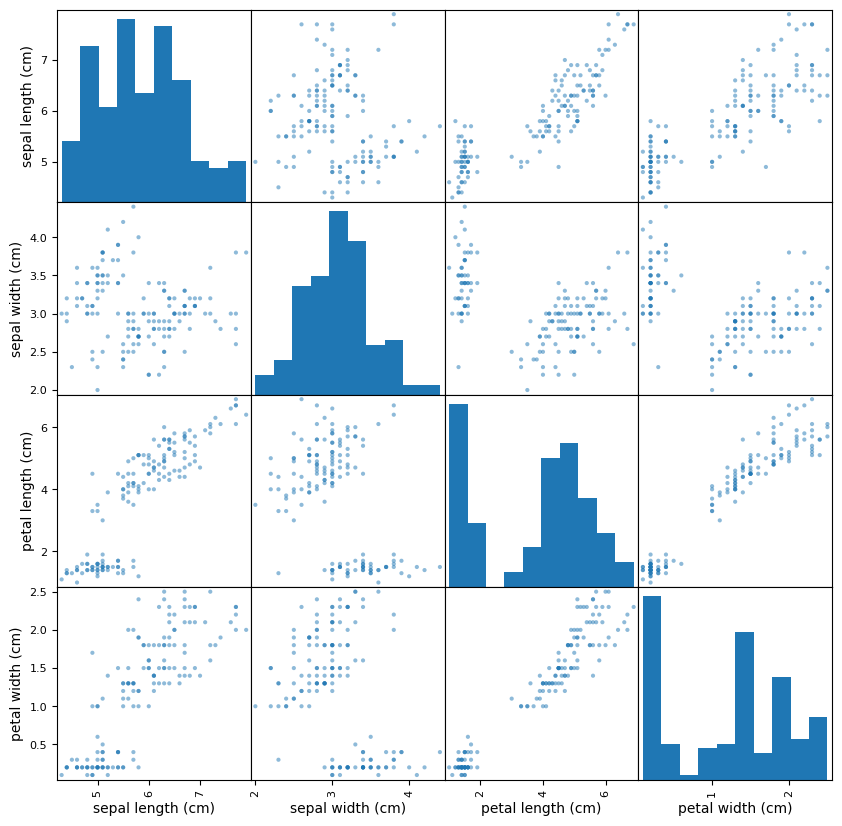

In [ ]:
from pandas.plotting import scatter_matrix

# Análise de dispersão
scatter_matrix(iris_df, figsize=(10, 10))
plt.show()


<ipython-input-65-6fcbf3c94048>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(iris_df[iris_df['species'] == species][feature], color=color, shade=True, ax=ax)
<ipython-input-65-6fcbf3c94048>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(iris_df[iris_df['species'] == species][feature], color=color, shade=True, ax=ax)
<ipython-input-65-6fcbf3c94048>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(iris_df[iris_df['species'] == species][feature], color=color, shade=True, ax=ax)
<ipython-input-65-6fcbf3c94048>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an

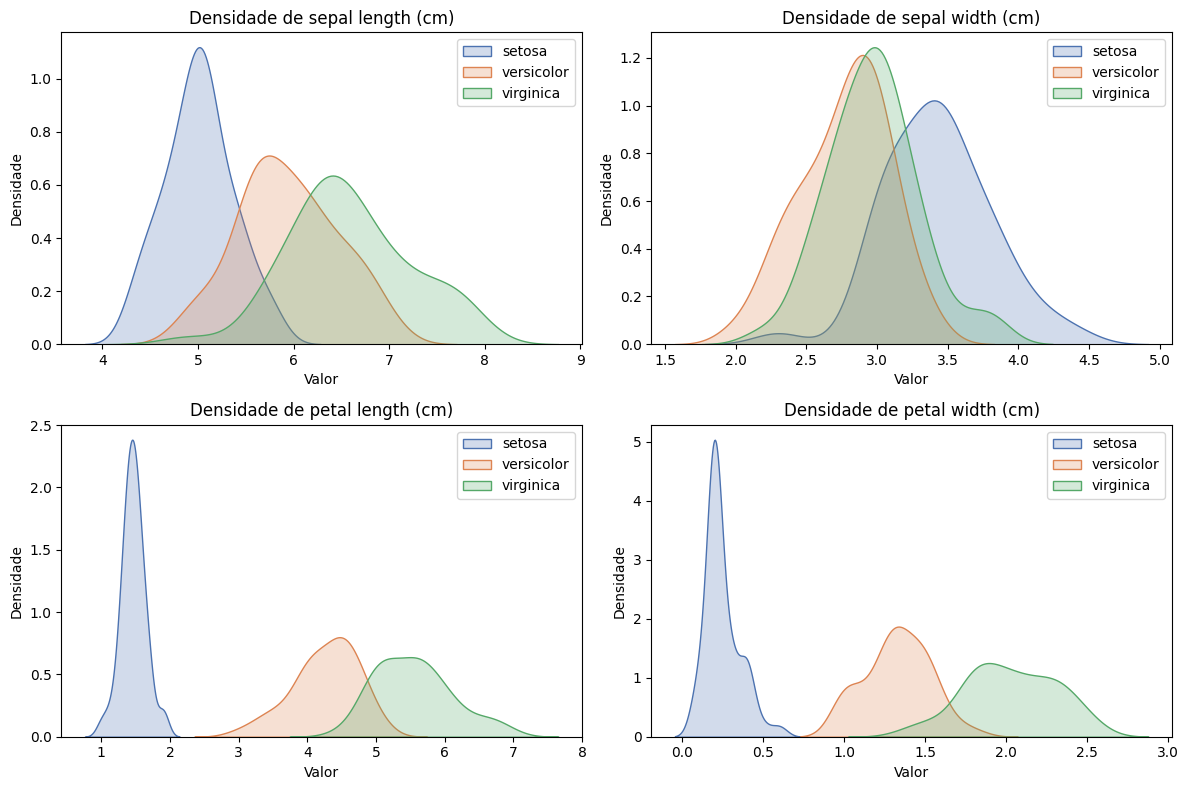

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Carregar o dataset Iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Mapear os números das espécies para os nomes
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Configurar a paleta de cores
palette = sns.color_palette("deep", 3)

# Criar gráficos de densidade separados por espécie
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, feature in zip(axes, iris_df.columns[:-1]):
    for species, color in zip(iris_df['species'].unique(), palette):
        sns.kdeplot(iris_df[iris_df['species'] == species][feature], color=color, shade=True, ax=ax)
    ax.set_title(f'Densidade de {feature}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidade')
    ax.legend(iris_df['species'].unique())

plt.tight_layout()
plt.show()


b. Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.

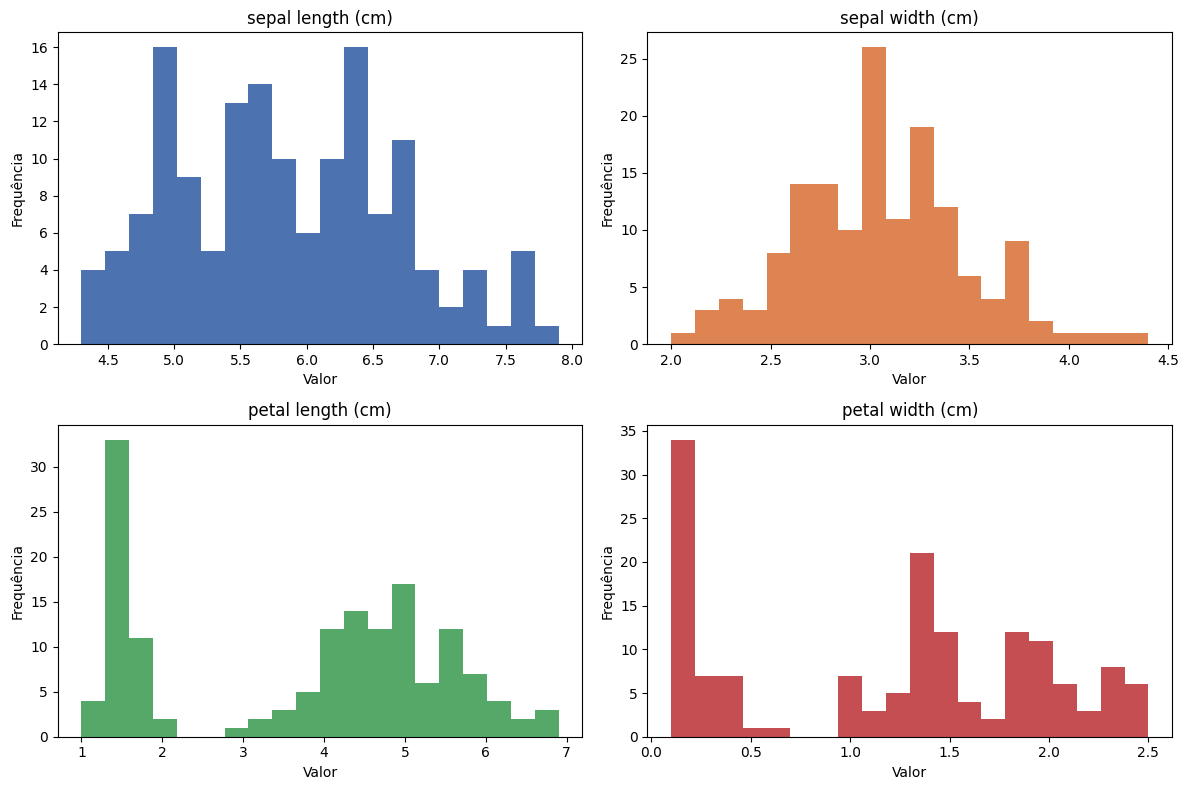

In [58]:
import matplotlib.pyplot as plt

# Configurar a paleta de cores usando seaborn
palette = sns.color_palette("deep", 4)

# Criar histogramas com cores personalizadas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, feature, color in zip(axes, iris_df.columns, palette):
    ax.hist(iris_df[feature], bins=20, color=color)
    ax.set_title(feature)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')

plt.tight_layout()
plt.show()


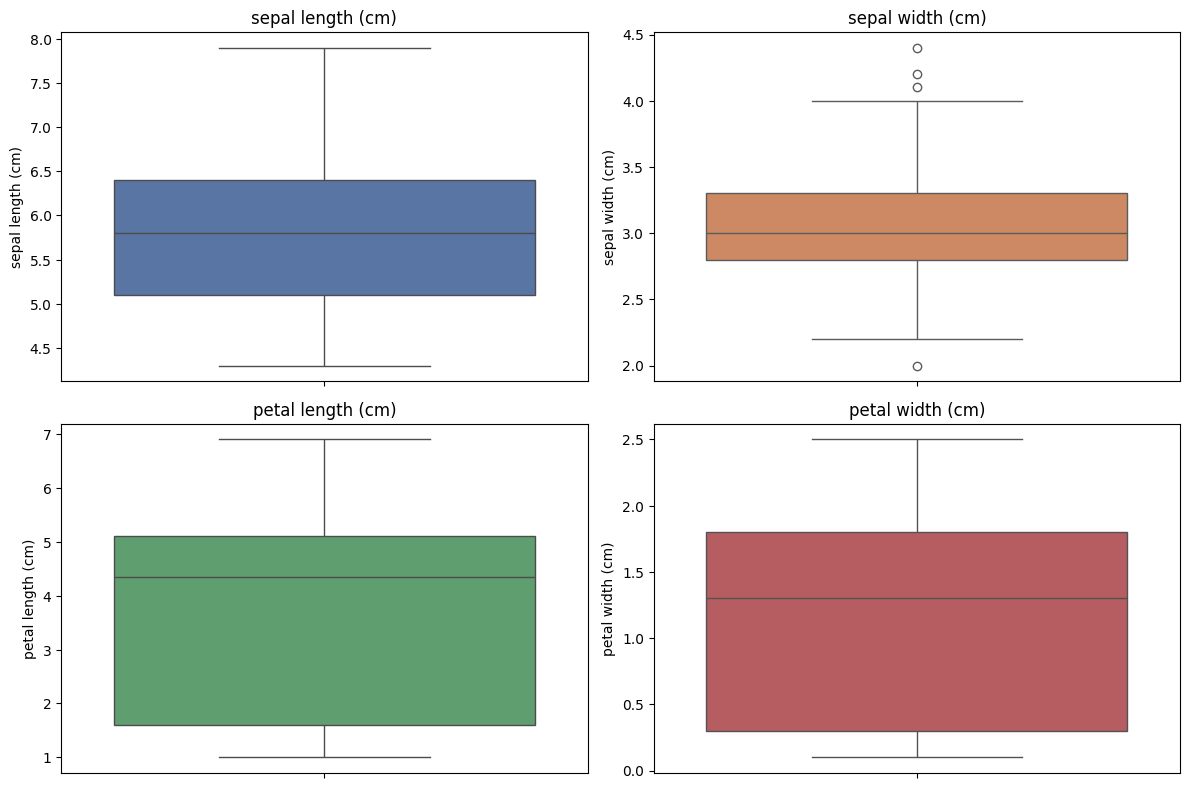

In [ ]:
import seaborn as sns

# Configurar cores para os boxplots
palette = sns.color_palette("deep", 4)

# Criar boxplots coloridos
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feature, color in zip(axes.flatten(), iris_df.columns, palette):
    sns.boxplot(data=iris_df, y=feature, ax=ax, color=color)
    ax.set_title(feature)

plt.tight_layout()
plt.show()

c. Somente olhando esses gráficos, é possível utilizando uma ou mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length,
Petal_Width) que sejam suficientes para diferenciar entre as diferentes espécies?

As características *petal lenght* e *petal widht* parecem ter menos sobreposição do que *sepal lenght* e *sepal widgt* e são mais propensas a distinguir entre as espécies de Iris. Elas apresentam distribuições com picos distintos, sugerindo que as diferentes espécies de flores possuem valores característicos para essas medidas. O mesmo ocorre na distribuição de dados no *bloxplot*.

d. Aplique a regressão logística para avaliar o modelo de classificação.

e. Calcule a acurácia, precisão e recall.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X = iris.data
y = iris.target

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Prever as classes para os dados de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Exibir o relatório de classificação
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Acurácia do modelo: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



f. Plote a matriz de confusao com matplotlib ou seaborn.

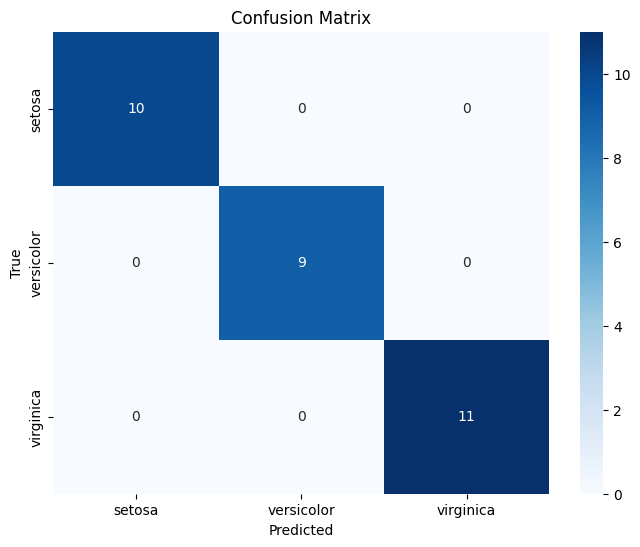

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Configurar o gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## 2. Utilize o dataset load_digits.


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

Responda:

a. Faça uma análise inicial sobre esse dataset

i. Quantos dados possui?

ii. Existem dados nulos? Se sim quantos?

iii. Todos são dados numéricos ou existem colunas com dados categóricos?

In [ ]:
# Converter para DataFrame do Pandas para melhor visualização das primeiras linhas
digits_df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])

# Exibir as primeiras linhas do DataFrame
print(digits_df.head())

   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   

   pixel_8  pixel_9  ...  pixel_54  pixel_55  pixel_56  pixel_57  pixel_58  \
0      0.0      0.0  ...       0.0       0.0       0.0       0.0       6.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0       0.0   
2      0.0      0.0  ...       5.0       0.0       0.0       0.0       0.0   
3      0.0      8.0  ...       9.0       0.0       0.0       0.0       7.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       0.0   

   pixel_59  pixel_60  pixel_61  pixel_62  pixel_63  
0      13.0   

In [ ]:
# Número de instâncias
num_samples = len(digits.data)
print(f'O dataset digits possui {num_samples} instâncias.')


O dataset digits possui 1797 instâncias.


In [74]:
# Contar quantos valores de pixel são exatamente zero
count_zeros = np.sum(data == 0.0)

print(f"Total de valores de pixel com valor zero: {count_zeros}")



Total de valores de pixel com valor zero: 56272


Neste dataset, não há dados nulos no sentido de valores NaN. Todos os pixels têm um valor inteiro entre 0 e 16, representando diferentes intensidades de cinza. No entanto, há valores iguais a zero, no entanto, esses valores não representam a nulidade de amostras.

In [ ]:
# Verificar o tipo de dados das features
data_type = type(digits.data[0, 0])
print(f'Tipo de dado das features: {data_type}')


Tipo de dado das features: <class 'numpy.float64'>


As *features* são valores inteiros que representam a intensidade dos pixels das imagens dos dígitos.

b. Aplique a regressão logística para avaliar o modelo de classificação.

c. Calcule a acurácia, precisão e recall.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prever as classes para os dados de teste
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Exibir as métricas
print(f'Acurácia do modelo: {accuracy:.2f}')
print(f'Precisão do modelo: {precision:.2f}')
print(f'Recall do modelo: {recall:.2f}')



Acurácia do modelo: 0.97
Precisão do modelo: 0.97
Recall do modelo: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


d. Plote a matriz de confusão com matplotlib ou seaborn

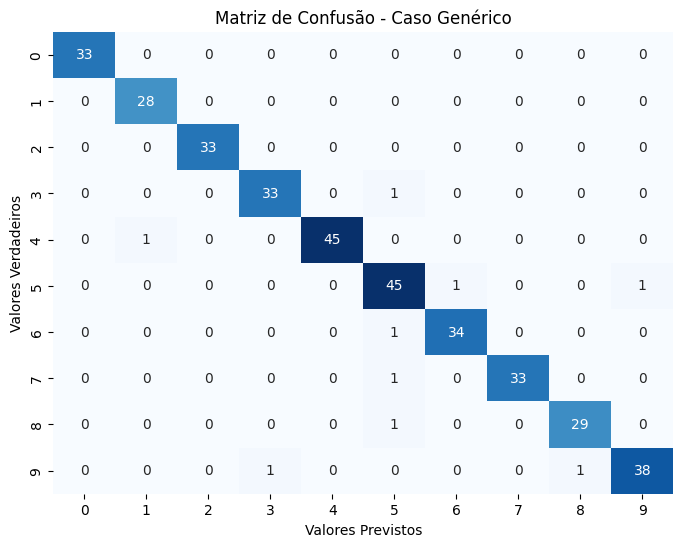

In [75]:
# Construir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão - Caso Genérico')
plt.show()

e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de
0-9 que são disponibilizados neste dataset

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do modelo: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



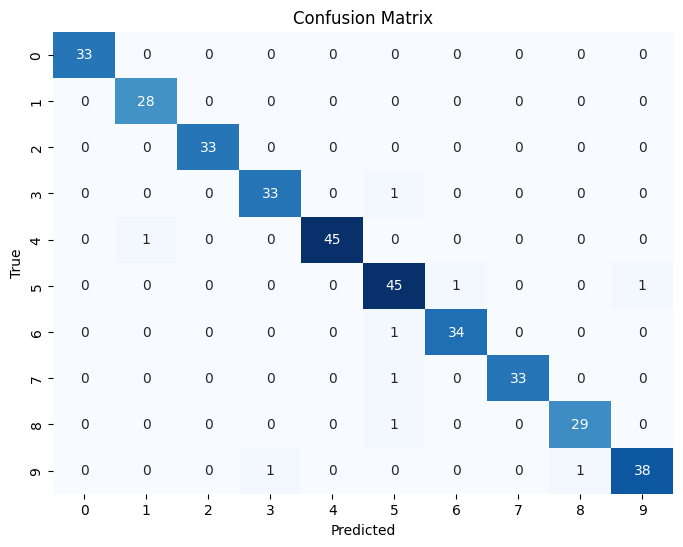

In [ ]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Prever as classes para os dados de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Exibir o relatório de classificação
print(classification_report(y_test, y_pred))

# Calcular e plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
